In [1]:
import numpy as np
import numpy.linalg as lg
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from scipy.linalg import expm
import community as community_louvain

df = pd.read_csv("/home/abdalah/Downloads/edges.csv")
df

ModuleNotFoundError: No module named 'community'

In [7]:
dp = pd.read_csv("/home/abdalah/Downloads/nodes.csv")



# Now when you print or display dp, you'll see all rows
print(dp)

    # index           label                               _pos
0         0          Myriel  array([-6.01506996, 12.40451206])
1         1        Napoleon  array([-6.03664231, 12.09537938])
2         2  MlleBaptistine  array([-5.78406796, 12.44552676])
3         3     MmeMagloire  array([-5.82777558, 12.56142255])
4         4    CountessDeLo  array([-6.3636875 , 12.49932915])
..      ...             ...                                ...
72       72       Toussaint  array([-5.24126392, 12.54542919])
73       73          Child1  array([-5.56162772, 13.37341473])
74       74          Child2  array([-5.63096686, 13.25275038])
75       75          Brujon  array([-5.35703702, 12.97373314])
76       76    MmeHucheloup  array([-5.35877143, 13.25836514])

[77 rows x 3 columns]


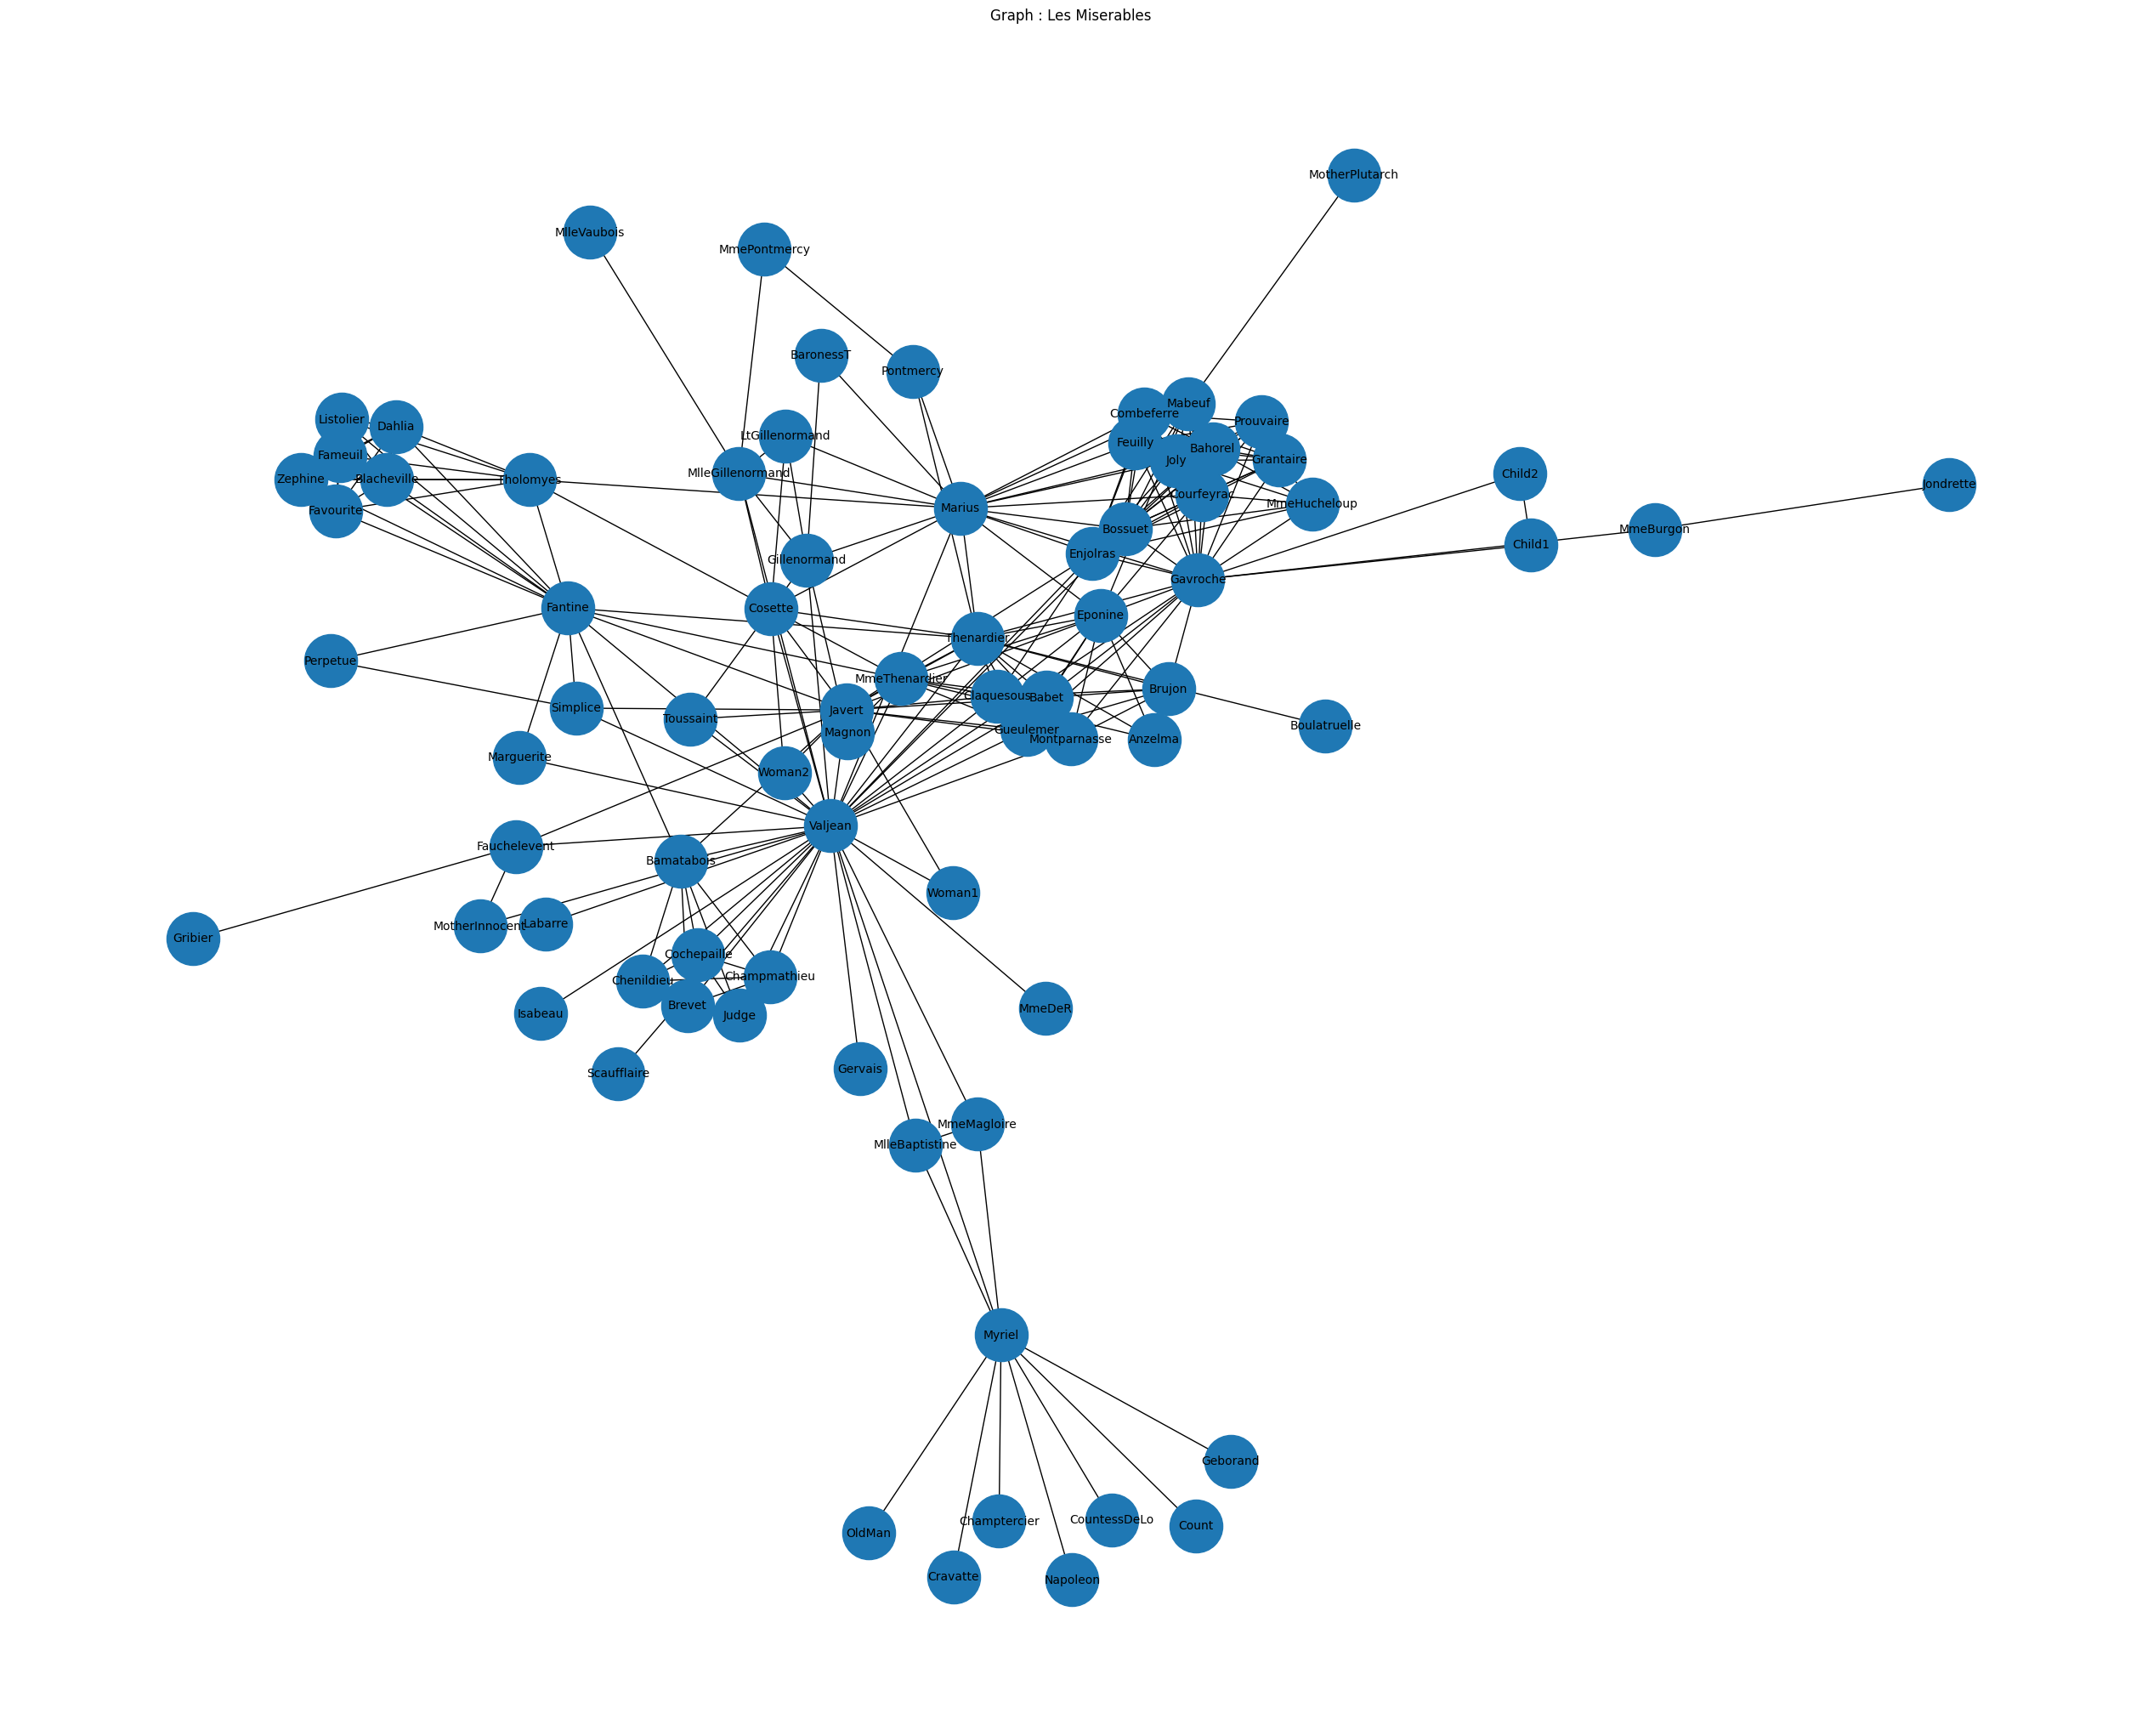

In [8]:
# Create the graph
G = nx.Graph()
G.add_edges_from(df.iloc[:, :2].values)

# Clean column names
dp.columns = dp.columns.str.strip()

# Create name map and relabel nodes
name_map = dict(zip(dp['# index'], dp['label']))
G = nx.relabel_nodes(G, name_map)

# Draw the graph
plt.figure(figsize=(25, 20))
plt.clf()
nx.draw(G, with_labels=True, node_size=2000, font_size=10)
plt.title("Graph : Les Miserables")
plt.savefig("G.png")
plt.show()


<a id='1'></a>
### Basic Statistics

In [58]:
# Number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Network density
density = nx.density(G)

# Average degree
avg_degree = sum(dict(G.degree()).values()) / num_nodes

# Degree distribution (basic)
degree_sequence = [d for n, d in G.degree()]
max_degree = max(degree_sequence)
min_degree = min(degree_sequence)

# Connected components
num_components = nx.number_connected_components(G)
largest_cc = max(nx.connected_components(G), key=len)
G_lcc = G.subgraph(largest_cc)

# Average shortest path length (only for largest connected component)
avg_path_length = nx.average_shortest_path_length(G_lcc)

# Global Clustering coefficient
avg_clustering = nx.average_clustering(G)

# Print the results
print("=== Network Statistics ===")
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Network density: {density:.4f}")
print(f"Average degree: {avg_degree:.2f}")
print(f"Maximum degree: {max_degree}")
print(f"Minimum degree: {min_degree}")
print(f"Number of connected components: {num_components}")
print(f"Average shortest path length (in LCC): {avg_path_length:.2f}")
print(f"Average clustering coefficient: {avg_clustering:.2f}")


=== Network Statistics ===
Number of nodes: 77
Number of edges: 254
Network density: 0.0868
Average degree: 6.60
Maximum degree: 36
Minimum degree: 1
Number of connected components: 1
Average shortest path length (in LCC): 2.64
Average clustering coefficient: 0.57


### Clustering distribution

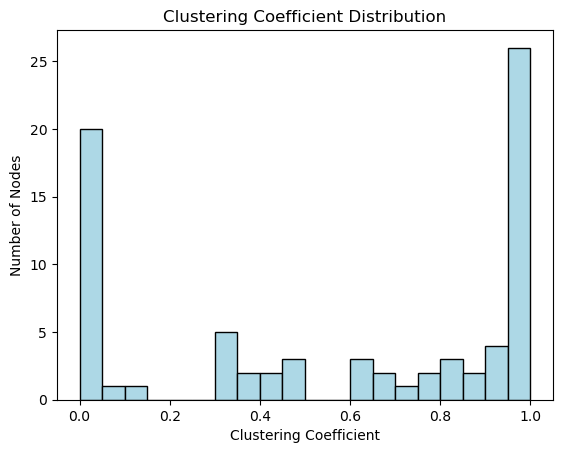

In [66]:
clustering = nx.clustering(G)
plt.hist(list(clustering.values()), bins=20, color='lightblue', edgecolor='black')
plt.title("Clustering Coefficient Distribution")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Number of Nodes")
plt.show()

### Degree Distribution

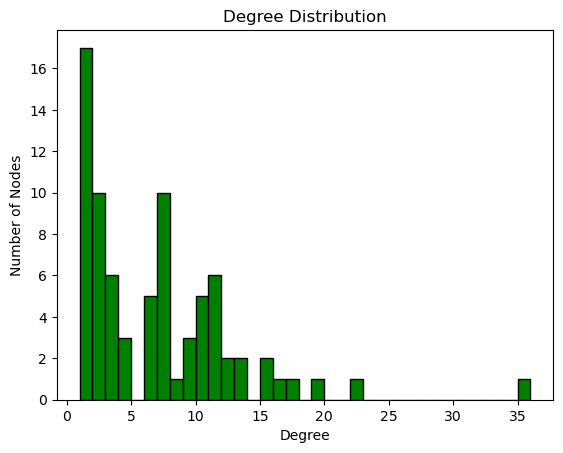

In [67]:
degree_sequence = [d for n, d in G.degree()]
plt.hist(degree_sequence, bins=range(1, max(degree_sequence)+1), color='green', edgecolor='black')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.show()

### Changing matrix to adjacency matrix

In [78]:
A=nx.to_numpy_array(G)

### Calculating number of different shapes

In [79]:
def freqG(A):
    n = len(A) # nodes
    e = np.ones(n)
    k = A@e # degrees.
    m = np.sum(k)/2 # edges
    Lambda, Q = lg.eigh(A)
    # A number of matrices/vectors we'll need in our computations
    A2 = A@A 
    A3 = A2@A
    A2a = A2*A
    A2b = A2 - np.diag(k)
    F10s = sum(A2b*(A2b-1))/2
    t = np.diag(A3)/2
    tk = t*(k-2)
    kk = k*(k-1)
    # The fragments F1...F15
    P2 = sum(kk/2)
    C3 = sum(t)/3
    P3 = (k-1).T@A@(k-1)/2-C3*3 
    S13 = kk.T@(k-2)/6
    C4 = (round(np.sum(Lambda**4)) - 4*P2 - 2*m)/8
    T31 = sum(tk)
    Diamond = sum(sum((A2a)*(A2a-1)))/4
    C5 = (round(np.sum(Lambda**5)) - 30*C3 - 10*T31)/10 # Number of C5
    Cr = tk.T@(k-3)/2
    T41 = (k-2).T@F10s - 2*Diamond
    Reindeer = (k-2).T@(A2*A)@(k-2)/2 - 2*Diamond
    T32 = t.T@sum(A2b) - 6*C3 - 2*T31 - 4*Diamond
    Bowtie = t.T@(t-1)/2-2*Diamond
    House = sum(sum(A*A2*A3))/2-9*C3-2*T31-4*Diamond
    C6 = (round(np.sum(Lambda**6)) - 2*m - 12*P2 -24*C3 - 6*P3 - 12*S13 - 48*C4 - 36*Diamond - 12*T41 - 24*Bowtie)/12
    Count = np.array([n,m,P2, C3, P3, S13, C4, T31, Diamond, C5, Cr, T41, Reindeer, T32, Bowtie, House, C6])
    return Count

In [83]:
Count = freqG(A)

# Print each of the relevant metrics by name
P2, C3, P3, S13, C4, T31, Diamond, C5, Cr, T41, Reindeer, T32, Bowtie, House, C6 = Count[2:17]

print("number of paths,P2:", P2)
print("number of triangles:", C3)
print("number of paths,P3:", P3)
print("number of stars,S13:", S13)
print("number of squares:", C4)
print("Tailed triangle,T31:", T31)
print("Diamond:", Diamond)
print("Regular pentagon:", C5)
print("Kite(Triangle with a tail of two):", Cr)
print("Extended tailed triangle,T41:", T41)
print("Tailed diamond(Reindeer):", Reindeer)
print("T32:", T32)
print("Bowtie:", Bowtie)
print("House:", House)
print("C6:", C6)

number of paths,P2: 2808.0
number of triangles: 467.0
number of paths,P3: 26784.0
number of stars,S13: 15177.0
number of squares: 2672.0
Tailed triangle,T31: 15347.0
Diamond: 4544.0
Regular pentagon: 16053.0
Cr: 110558.0
T41: 113516.0
Reindeer: 158971.0
T32: 141342.0
Bowtie: 20485.0
House: 64807.0
C6: 98307.0


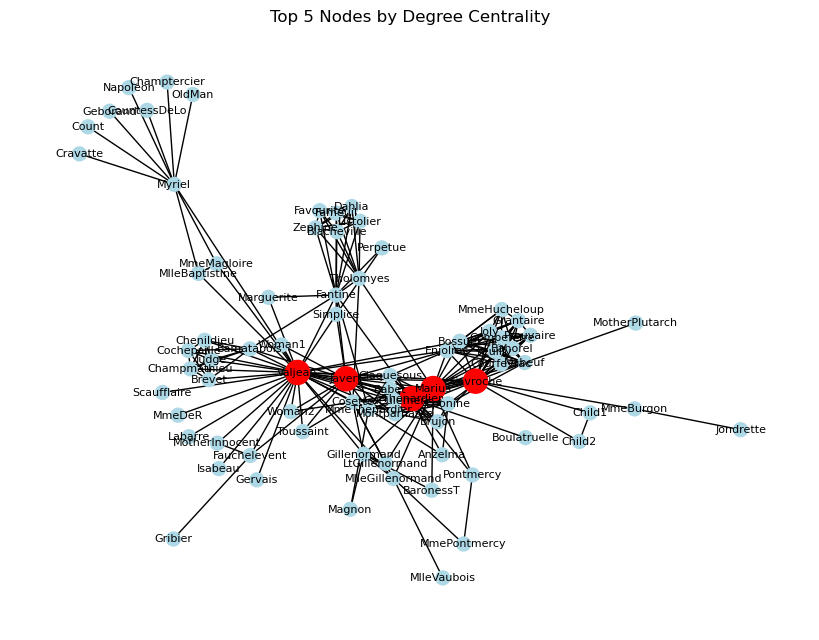

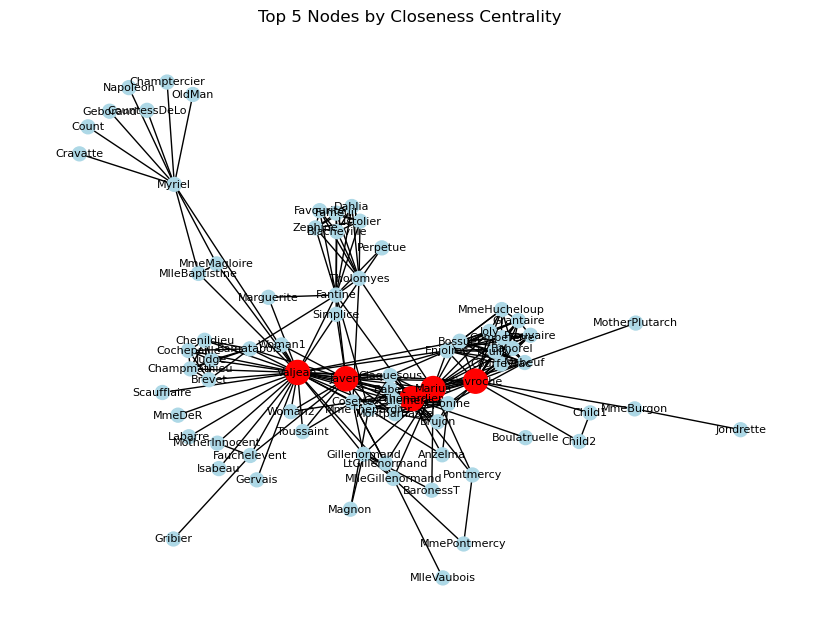

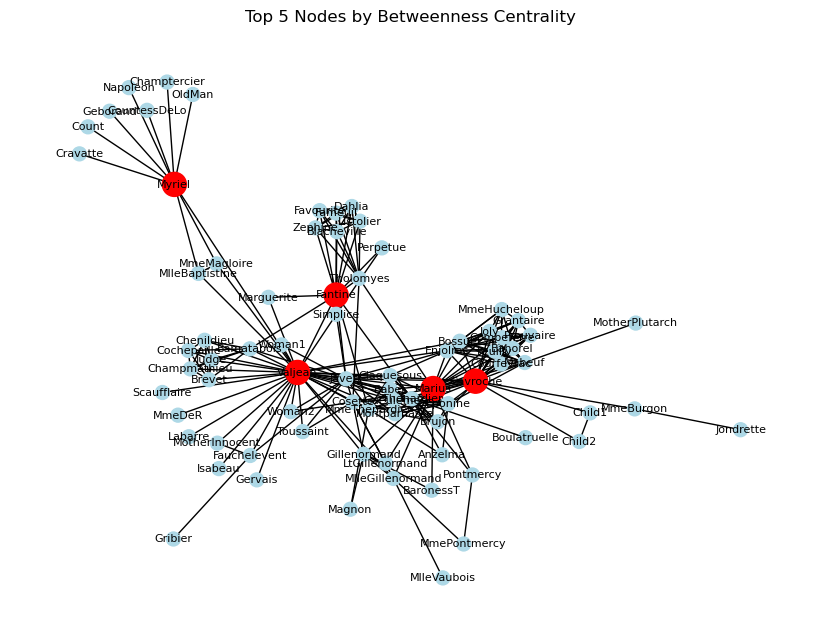

In [163]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Get top 5 nodes for each measure
top_degree = sorted(degree_centrality.items(), key=lambda x: -x[1])[:5]
top_closeness = sorted(closeness_centrality.items(), key=lambda x: -x[1])[:5]
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: -x[1])[:5]

# Extract node labels
nodes_degree = [node for node, _ in top_degree]
nodes_closeness = [node for node, _ in top_closeness]
nodes_betweenness = [node for node, _ in top_betweenness]

# Define position layout once
pos = nx.spring_layout(G, seed=42)

# Highlighting function
def highlight_nodes(G, nodes, title):
    node_colors = ["red" if node in nodes else "lightblue" for node in G.nodes()]
    node_sizes = [300 if node in nodes else 100 for node in G.nodes()]
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, node_color=node_colors, node_size=node_sizes, with_labels=True, font_size=8)
    plt.title(title)
    plt.show()

# Visualize
highlight_nodes(G, nodes_degree, "Top 5 Nodes by Degree Centrality")
highlight_nodes(G, nodes_closeness, "Top 5 Nodes by Closeness Centrality")
highlight_nodes(G, nodes_betweenness, "Top 5 Nodes by Betweenness Centrality")


In [164]:
print("Top 5 Degree Centrality Nodes:", nodes_degree)
print("Top 5 Closeness Centrality Nodes:", nodes_closeness)
print("Top 5 Betweenness Centrality Nodes:", nodes_betweenness)

# Check overlaps
overlap_degree_closeness = set(nodes_degree) & set(nodes_closeness)
overlap_degree_betweenness = set(nodes_degree) & set(nodes_betweenness)
overlap_closeness_betweenness = set(nodes_closeness) & set(nodes_betweenness)

print("\nOverlap between Degree & Closeness:", overlap_degree_closeness)
print("Overlap between Degree & Betweenness:", overlap_degree_betweenness)
print("Overlap between Closeness & Betweenness:", overlap_closeness_betweenness)


Top 5 Degree Centrality Nodes: ['Valjean', 'Gavroche', 'Marius', 'Javert', 'Thenardier']
Top 5 Closeness Centrality Nodes: ['Valjean', 'Marius', 'Thenardier', 'Javert', 'Gavroche']
Top 5 Betweenness Centrality Nodes: ['Valjean', 'Myriel', 'Gavroche', 'Marius', 'Fantine']

Overlap between Degree & Closeness: {'Valjean', 'Marius', 'Thenardier', 'Gavroche', 'Javert'}
Overlap between Degree & Betweenness: {'Valjean', 'Gavroche', 'Marius'}
Overlap between Closeness & Betweenness: {'Valjean', 'Gavroche', 'Marius'}


In [165]:

def print_top_centralities_with_scores(centrality_dict, top_nodes, title):
    print(f"\n{title}")
    print("-" * len(title))
    for node in top_nodes:
        print(f"{node}: {centrality_dict[node]:.4f}")

# Print for top nodes in each category
print_top_centralities_with_scores(degree_centrality, nodes_degree, "Top 5 Nodes by Degree Centrality")
print_top_centralities_with_scores(closeness_centrality, nodes_closeness, "Top 5 Nodes by Closeness Centrality")
print_top_centralities_with_scores(betweenness_centrality, nodes_betweenness, "Top 5 Nodes by Betweenness Centrality")



Top 5 Nodes by Degree Centrality
--------------------------------
Valjean: 0.4737
Gavroche: 0.2895
Marius: 0.2500
Javert: 0.2237
Thenardier: 0.2105

Top 5 Nodes by Closeness Centrality
-----------------------------------
Valjean: 0.6441
Marius: 0.5315
Thenardier: 0.5170
Javert: 0.5170
Gavroche: 0.5135

Top 5 Nodes by Betweenness Centrality
-------------------------------------
Valjean: 0.5700
Myriel: 0.1768
Gavroche: 0.1651
Marius: 0.1320
Fantine: 0.1296


### Random Network

In [167]:
m = np.sum(A) / 2
triangle_list = []
degree_centrality_list = []
closeness_centrality_list = []
betweenness_centrality_list = []
clustering_coefficient_list = []
square_list = []

for _ in range(50):
    G2 = nx.erdos_renyi_graph(n, 2 * m / (n * (n - 1)))
    A2 = nx.to_numpy_array(G2)

    # Triangles per node and total
    random_triangle_per_node = np.linalg.matrix_power(A2, 3).diagonal() / 2
    random_triangle_total = np.sum(random_triangle_per_node) / 3
    triangle_list.append(random_triangle_total)

    # Degree centrality
    degree_centrality = nx.degree_centrality(G2)
    avg_degree_centrality = np.mean(list(degree_centrality.values()))
    degree_centrality_list.append(avg_degree_centrality)

    # Closeness centrality
    closeness_centrality = nx.closeness_centrality(G2)
    avg_closeness_centrality = np.mean(list(closeness_centrality.values()))
    closeness_centrality_list.append(avg_closeness_centrality)

    # Betweenness centrality
    betweenness_centrality = nx.betweenness_centrality(G2)
    avg_betweenness_centrality = np.mean(list(betweenness_centrality.values()))
    betweenness_centrality_list.append(avg_betweenness_centrality)

    # Clustering coefficient
    clustering_coefficient = nx.clustering(G2)
    avg_clustering_coefficient = np.mean(list(clustering_coefficient.values()))
    clustering_coefficient_list.append(avg_clustering_coefficient)

    # Squares using eigenvalues
    w = np.linalg.eigvalsh(A2)
    random_fourth_power = np.sum(w ** 4)
    random_degree = np.diag(A2 @ A2)
    edge_walks = 2 * m
    path2_walks = 4 * sum(i * (i - 1) / 2 for i in random_degree)
    squares = (random_fourth_power - edge_walks - path2_walks) / 8
    square_list.append(squares)

# Print average values from 50 ER graphs
print("Erdős–Rényi Random Graph Averages (from 50 samples):")
print("Average Number of Triangles:", np.mean(triangle_list))
print("Average Degree Centrality:", np.mean(degree_centrality_list))
print("Average Closeness Centrality:", np.mean(closeness_centrality_list))
print("Average Betweenness Centrality:", np.mean(betweenness_centrality_list))
print("Average Clustering Coefficient:", np.mean(clustering_coefficient_list))
print("Average Number of Squares:", np.mean(square_list))


Erdős–Rényi Random Graph Averages (from 50 samples):
Average Number of Triangles: 47.8
Average Degree Centrality: 0.08676008202323991
Average Closeness Centrality: 0.4050388934297826
Average Betweenness Centrality: 0.019809250398724082
Average Clustering Coefficient: 0.08625896325896325
Average Number of Squares: 228.24499999999986


## Compute the Spectral bipartivity

In [168]:
# Compute eigenvalues
eigvals = np.linalg.eigvals(A)
lambda_1 = max(eigvals.real)  # Largest eigenvalue
lambda_n = min(eigvals.real)  # Smallest eigenvalue

# Your formula for b_lambda
b_lambda = -lambda_n / lambda_1
print(f"Spectral bipartivity (b_λ): {b_lambda:.4f}")

Spectral bipartivity (b_λ): 0.4387


## Walk-based Bipartivity

In [171]:
# Compute matrix exponentials
A_exp = expm(A)      # e^A
A_exp_neg = expm(-A) # e^{-A}

b_e = np.trace(A_exp_neg) / np.trace(A_exp)
print(f"Walk-based bipartivity (b_e): {b_e:.4f}")

Walk-based bipartivity (b_e): 0.0027


In [172]:
# Check if eigenvalues satisfy bipartite symmetry (λ_1 = -λ_n)
print(f"Largest eigenvalue (λ_1): {lambda_1:.4f}")
print(f"Smallest eigenvalue (λ_n): {lambda_n:.4f}")
print(f"Is bipartite? {nx.is_bipartite(G)}")

Largest eigenvalue (λ_1): 12.0058
Smallest eigenvalue (λ_n): -5.2671
Is bipartite? False


## Interpretation 
1. **Structural Tragedy Metric**  
   An extreme walk-based bipartivity score (bₑ=0.0027) structurally encodes the novel's tragic cycles, where characters' crossed loyalties create inescapable downward spirals.

2. **Complex Moral Network**  
   The network's limited spectral bipartivity (bᵧ=0.4387) mathematically rejects simple moral binaries, mirroring Hugo's nuanced portrayal of justice and mercy as interconnected forces.

## Number of edges in the partitions 

In [173]:
# Compute eigenvalues and eigenvectors of A
eigenvalues, eigenvectors = np.linalg.eig(A)

# Sort eigenvalues in descending order and get their indices
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Get the eigenvector corresponding to the second largest positive eigenvalue
second_eigenvector = sorted_eigenvectors[:, 1]

# Partition the network based on the signs of this eigenvector
C1 = np.where(second_eigenvector > 0)[0]  # Indices with positive values
C2 = np.where(second_eigenvector <= 0)[0] # Indices with non-positive values

# Calculate the number of edges within communities and between communities
edges_within_C1 = np.sum(A[np.ix_(C1, C1)]) / 2  # Divide by 2 since adjacency matrix is symmetric
edges_within_C2 = np.sum(A[np.ix_(C2, C2)]) / 2
edges_between = np.sum(A[np.ix_(C1, C2)])

print(f"Number of edges within community C1: {edges_within_C1}")
print(f"Number of edges within community C2: {edges_within_C2}")
print(f"Number of edges between communities C1 and C2: {edges_between}")

Number of edges within community C1: 75.0
Number of edges within community C2: 156.0
Number of edges between communities C1 and C2: 23.0



1. **Protagonist Hub vs Antagonist Fragmentation**  
   The protagonist faction forms a tight-knit hub (156 connections among 18 characters), while antagonists remain sparsely connected (75 links across 59 characters), reflecting Hugo's theme of redemption through bonds versus isolation in moral decay.

2. **Critical Cross-Faction Interactions**  
   Only 23 of 254 total edges connect opposing factions, yet these rare interactions - like Javert's pursuit of Valjean and Éponine's doomed love for Marius - drive every major plot conflict.


## Spectral Bipartitioning

Nodes in C1: 18 (e.g., ['MmeBurgon', 'Jondrette', 'Gavroche']...)
Nodes in C2: 59 (e.g., ['Napoleon', 'Myriel', 'MlleBaptistine']...)


/tmp/ipykernel_3634640/1781959591.py:4: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()


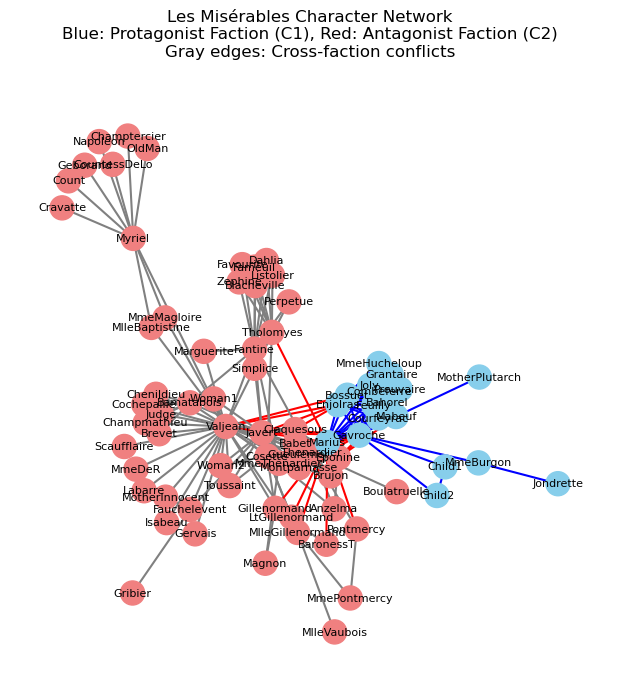

In [174]:
from scipy.linalg import eigh

# Spectral bipartitioning
A = nx.adjacency_matrix(G).todense()
eigvals, eigvecs = eigh(A)
partition = (eigvecs[:, -2] >= 0)  # Second largest eigenvector

# Create node lists for each partition
nodes = list(G.nodes())
C1_nodes = [nodes[i] for i in np.where(partition)[0]]  # Partition 1 nodes
C2_nodes = [nodes[i] for i in np.where(~partition)[0]] # Partition 2 nodes

print(f"Nodes in C1: {len(C1_nodes)} (e.g., {C1_nodes[:3]}...)")
print(f"Nodes in C2: {len(C2_nodes)} (e.g., {C2_nodes[:3]}...)")

# Visualization
plt.figure(figsize=(6,6))
pos = nx.spring_layout(G, seed=42)

# Color nodes by partition
node_colors = ["skyblue" if node in C1_nodes else "lightcoral" for node in nodes]

# Color edges: blue for within-C1, red for within-C2, gray for between
edge_colors = []
for u, v in G.edges():
    if u in C1_nodes and v in C1_nodes:
        edge_colors.append("blue")
    elif u in C2_nodes and v in C2_nodes:
        edge_colors.append("gray")
    else:
        edge_colors.append("red")

nx.draw(G, pos, node_color=node_colors, edge_color=edge_colors, 
        width=1.5, with_labels=True, font_size=8)
plt.title("Les Misérables Character Network\n"
          "Blue: Protagonist Faction (C1), Red: Antagonist Faction (C2)\n"
          "Gray edges: Cross-faction conflicts", pad=20)
plt.show()

## Detect Community using modularity maximization 

### **Identified Communities & Interpretation**

| Community | Characters                     | Narrative Role                     |
|-----------|--------------------------------|------------------------------------|
| 0         | Valjean, Cosette, Marius       | Protagonists (redemption arc)      |
| 1         | Thénardier, Éponine            | Antagonists (criminal network)     |
| 2         | Javert, Police Officers        | Law enforcement                    |
| 3         | Enjolras,Gavroche , Students  | Revolutionary student group        |
| 4         | Bishop Myriel         | Early-story moral influences       |
| 5         | Fantine, simplice, In-keepers | Peripheral ties               |

**Observations**:
- **High Modularity**: Communities align with plotlines (e.g., Valjean’s journey vs. student revolts).

## Modularity

In [11]:
# Partition the graph
partition = community_louvain.best_partition(G)

# Get modularity score
modularity = community_louvain.modularity(partition, G)
print(f"Modularity: {modularity:.4f}")

# Number of communities
num_communities = len(set(partition.values()))
print(f"Number of communities: {num_communities}")

Modularity: 0.5591
Number of communities: 6


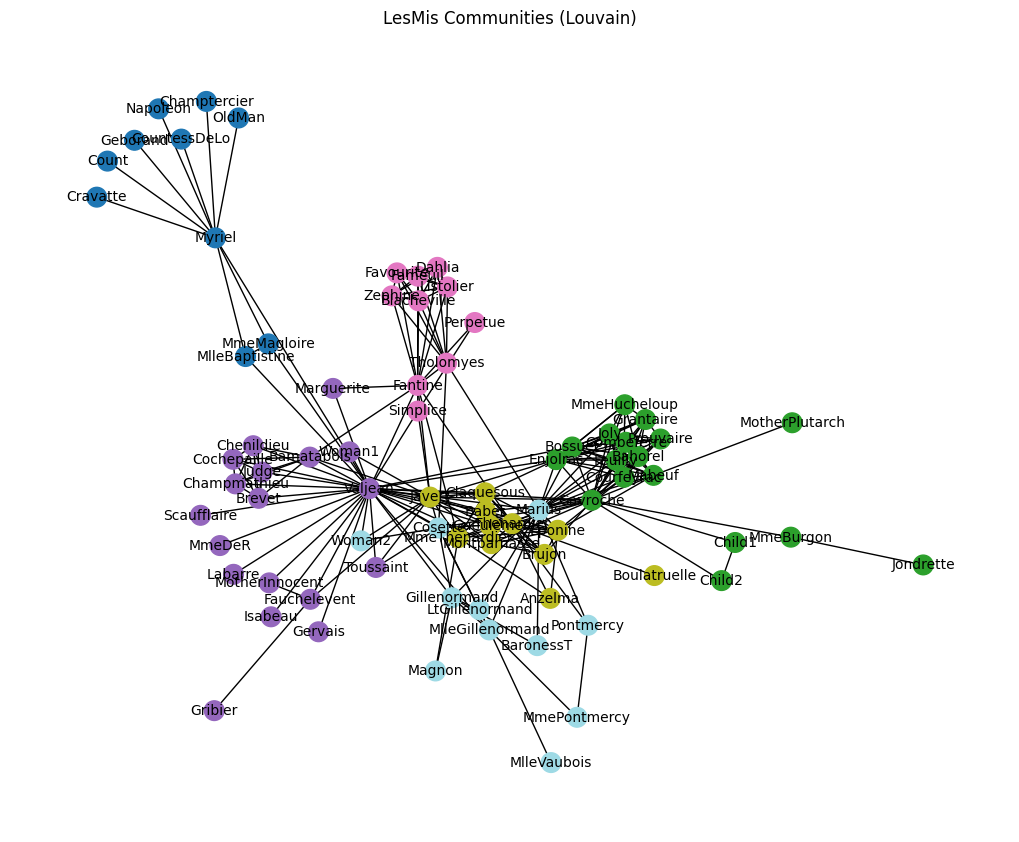

In [25]:
# Assign colors to nodes based on communities
colors = [partition[node] for node in G.nodes()]
pos = nx.spring_layout(G, seed=42)  # Layout for consistency

plt.figure(figsize=(10, 8))
nx.draw(G, pos, node_color=colors, cmap=plt.cm.tab20, with_labels=True,node_size=200, font_size=10 )

plt.title("LesMis Communities (Louvain)")
plt.show()

## Number of triangles in each community

In [26]:
import networkx.algorithms.community as nx_comm

# Check partition quality
print(f"Modularity: {nx_comm.modularity(G, nx_comm.label_propagation_communities(G)):.3f}")

# Count triangles per community
for c in set(partition.values()):
    sg = G.subgraph([n for n in partition if partition[n] == c])
    triangles = sum(nx.triangles(sg).values()) / 3  # Each triangle counted 3x
    print(f"Community {c}: {triangles} triangle(s)")

Modularity: 0.527
Community 0: 1.0 triangle(s)
Community 1: 170.0 triangle(s)
Community 2: 36.0 triangle(s)
Community 3: 57.0 triangle(s)
Community 4: 62.0 triangle(s)
Community 5: 11.0 triangle(s)
